In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
#tf.enable_eager_execution()

from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

import keras
import keras.backend
from keras import layers
from keras import models
import keras.utils

print(tf.__version__)

# Helper libraries
import numpy as np

from matplotlib.colors import LogNorm
from matplotlib import gridspec
import math
import time
import h5py
import sklearn
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

import os
import datetime



/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


In [2]:
starttime = time.time()

In [3]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'white',
         'axes.grid':True,
         'grid.alpha':1.0}
plt.rcParams.update(params)
plt.style.context('default')

In [4]:
PlotHistogramsOnly=False



In [5]:
dirs = ['LRP/LRP_hist/', 'LRP/', 'ROC/']

day = datetime.date.today().strftime('%m%d%y') + '/'
    
for d in dirs:
    if not os.path.exists(d+day):
        print('creating '+d+day)
        os.makedirs(d+day)

creating LRP/LRP_hist/072320/
creating LRP/072320/
creating ROC/072320/


In [6]:
def GetPreProcessedArrays(totalVar, nXvar):
    
    setday = '072220'
    
    file_extension = str(totalVar)+'var_'+str(nXvar)+'Xvar_'+'normalized.npz'
    
    testname    = 'PreProcessing/'+setday+'/test_variables_'+file_extension
    trainname   = 'PreProcessing/'+setday+'/train_variables_'+file_extension
    examplename = 'PreProcessing/'+setday+'/example_variables_'+file_extension
    
    testvarFile    = np.load(testname)
    trainvarFile   = np.load(trainname)
    examplevarFile = np.load(examplename)
    
    testlabels    = testvarFile['labels']
    trainlabels   = trainvarFile['labels']
    examplelabels = examplevarFile['labels']
    
    test_variables    = [testvarFile[key] for key in testvarFile if (not 'label' in key and not 'vari' in key)]
    train_variables   = [trainvarFile[key] for key in trainvarFile if (not 'label' in key and not 'vari' in key)]
    example_variables = [examplevarFile[key] for key in examplevarFile if (not 'label' in key and not 'vari' in key)]
    
    return test_variables, train_variables, example_variables, testlabels, trainlabels, examplelabels
    

In [7]:
variables = []
expertVariables = []

expertVariables = ['chMult',
                   'jetpull',
                   'tau1_b05',
                   'tau2_b05',
                   'tau3_b05',
                   'tau1_sd_b05',
                   'tau2_sd_b05',
                   'tau3_sd_b05',
                   'tau1_b10',
                   'tau2_b10',
                   'tau3_b10',
                   'tau1_sd_b10',
                   'tau2_sd_b10',
                   'tau3_sd_b10',
                   'tau1_b15',
                   'tau2_b15',
                   'tau3_b15',
                   'tau1_sd_b15',
                   'tau2_sd_b15',
                   'tau3_sd_b15',
                   'tau1_b20',
                   'tau2_b20',
                   'tau3_b20',
                   'tau1_sd_b20',
                   'tau2_sd_b20',
                   'tau3_sd_b20',
                   'jetMass',
                   'jetMassSD',
                  ]

variables = ['jetconstEta_abs',
                'jetconstE_log',
                'jetconstPt_Jetlog',
                'charge',
                'isEle',
                'isPho',
                'isMuon',
                'isCh',
                'isNh',
                'delta_eta',
                'delta_phi',
                'deltaR_jet',
                'deltaR_subjet0',
                'deltaR_subjet1',
                'dxy',
                'dz',
               ]

allVariables = ['jetconstPt_log'] + variables + expertVariables
nVar = len(variables + expertVariables)
variables_in_plots = '__'+str(nVar+1)+'var__jetconstPt_log'

totalVar = len(allVariables)
nXvar = len(expertVariables)

for var in variables:
    variables_in_plots += '__'+var
for xvar in expertVariables:
    variables_in_plots += '__X'+xvar

print(variables_in_plots)

__45var__jetconstPt_log__jetconstEta_abs__jetconstE_log__jetconstPt_Jetlog__charge__isEle__isPho__isMuon__isCh__isNh__delta_eta__delta_phi__deltaR_jet__deltaR_subjet0__deltaR_subjet1__dxy__dz__XchMult__Xjetpull__Xtau1_b05__Xtau2_b05__Xtau3_b05__Xtau1_sd_b05__Xtau2_sd_b05__Xtau3_sd_b05__Xtau1_b10__Xtau2_b10__Xtau3_b10__Xtau1_sd_b10__Xtau2_sd_b10__Xtau3_sd_b10__Xtau1_b15__Xtau2_b15__Xtau3_b15__Xtau1_sd_b15__Xtau2_sd_b15__Xtau3_sd_b15__Xtau1_b20__Xtau2_b20__Xtau3_b20__Xtau1_sd_b20__Xtau2_sd_b20__Xtau3_sd_b20__XjetMass__XjetMassSD


In [8]:
modelN = 1
patience = 2

model_name = '1DCNN_'+str(patience)+'ptc_norm_'+str(totalVar)+'var_'+str(nXvar)+'Xvar_'+str(modelN)+'.h5'
print(model_name)

1DCNN_2ptc_norm_45var_28Xvar_1.h5


In [9]:
test_variables, train_variables, example_variables, \
testlabels, trainlabels, example_labels = GetPreProcessedArrays(totalVar, nXvar)



In [10]:
# i = 1
# test_variables[i] = test_variables[i].reshape(test_variables[i].shape[0],1)
# train_variables[i] = train_variables[i].reshape(train_variables[i].shape[0],1)
# example_variables[i] = example_variables[i].reshape(example_variables[i].shape[0],1)

In [11]:
test_variables[-1].shape

(441390, 1)

In [12]:
# def build_model(n):
    
#     inpts = []
#     xlayers = []
#     for i in range(n):
#         inpt = layers.Input(shape = (20,1))
        
#         x = layers.Conv1D(64, 3, padding = 'same', activation='relu')(inpt)
#         x = layers.Conv1D(64, 1, padding = 'same', activation='relu')(x)
#         x = layers.MaxPool1D(2)(x)
#         x = layers.Conv1D(32, 3, padding = 'same', activation='relu')(x)
#         x = layers.Conv1D(32, 1, padding = 'same', activation='relu')(x)
#         x = layers.MaxPool1D()(x)
#         x = layers.Flatten()(x)
        
#         inpts.append(inpt)
#         xlayers.append(x)
    
#     if(n > 1):
#         x = layers.concatenate(inputs=xlayers, axis=-1)

#     x = layers.Dense(64, activation='relu')(x)
#     output = layers.Dense(2, activation='softmax')(x)
#     model = models.Model(inputs=inpts, outputs=output)
#     model.compile(loss='categorical_crossentropy',
#                 optimizer='adam',
#                 metrics=['categorical_crossentropy', 'accuracy'])
    
#     return model

In [13]:
def build_model(n, nex):
    
    inpts = []
    xaugs = []
    xlayers = []
    
    # loop over all input variables
    for i in range(n):
        
        # particle list inputs 
        if(i < n-nex):

            inpt = layers.Input(shape = (20,1))

            x = layers.Conv1D(64, 3, padding = 'same', activation='relu')(inpt)
            x = layers.Conv1D(64, 1, padding = 'same', activation='relu')(x)
            x = layers.MaxPool1D(2)(x)
            x = layers.Conv1D(32, 3, padding = 'same', activation='relu')(x)
            x = layers.Conv1D(32, 1, padding = 'same', activation='relu')(x)
            x = layers.MaxPool1D()(x)
            x1 = layers.Flatten()(x)

            inpts.append(inpt)
            xlayers.append(x1)
        
        
        # expert variable inputs 
        elif((nex > 0)):

            inpt = layers.Input(shape = (1,))
            xaugs.append(inpt)
    
    #concatenation of particle list inputs with expert variable inputs
    if(n > 1):
        x = layers.concatenate(inputs=xlayers+xaugs, axis=-1)

    x = layers.Dense(256, activation='relu')(x)
    
    output = layers.Dense(2, activation='softmax')(x) 
    model = models.Model(inputs=inpts+xaugs, outputs=output)
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['categorical_crossentropy', 'accuracy'])
    
    return model

In [14]:
Ntotal = len(example_variables)
Nexpert = len(expertVariables)

CNN = build_model( Ntotal, Nexpert )


Instructions for updating:
Colocations handled automatically by placer.


In [15]:
# for lay in CNN.layers:
#     print(lay.name)

In [16]:
example_result = CNN.predict(x = example_variables)
results = CNN.evaluate(x = example_variables, y = example_labels, verbose = 0)
print(example_result)
print(results)

[[0.5129793  0.48702073]
 [0.505214   0.49478605]
 [0.5127837  0.48721632]
 ...
 [0.49309638 0.5069035 ]
 [0.51272655 0.48727345]
 [0.507912   0.49208808]]
[0.6925035658722567, 0.6925035658722567, 0.5074748572738769]


In [17]:
circleCNN = build_model( Ntotal, Nexpert )

In [18]:
example_result = circleCNN.predict(x = example_variables)
results = circleCNN.evaluate(x = example_variables, y = example_labels)
print(example_result)
print(results)

3679/3679 [==============================] - 1s 351us/step
[[0.48324263 0.51675737]
 [0.48561096 0.514389  ]
 [0.48966944 0.51033056]
 ...
 [0.49322775 0.5067723 ]
 [0.4889649  0.51103514]
 [0.4876934  0.5123066 ]]
[0.6931617662743985, 0.6931617662743985, 0.5009513452312939]


In [19]:
#!ls model
best_model = keras.models.load_model('model/'+model_name)
best_model.summary()
results = best_model.evaluate(test_variables, testlabels)
print(results)

Instructions for updating:
Use tf.cast instead.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_91 (InputLayer)           (None, 20, 1)        0                                            
__________________________________________________________________________________________________
input_92 (InputLayer)           (None, 20, 1)        0                                            
__________________________________________________________________________________________________
input_93 (InputLayer)           (None, 20, 1)        0                                            
__________________________________________________________________________________________________
input_94 (InputLayer)           (None, 20, 1)        0                                            
_____________________________________________________________

441390/441390 [==============================] - 107s 242us/step
[0.39192804833008804, 0.39192804833008804, 0.8310201862304049]


In [20]:
# Plot ROC

predict = best_model.predict(test_variables)
from sklearn.metrics import roc_curve, auc

In [23]:
plt.rcParams['figure.dpi'] = 90

In [23]:
variables_in_plots = '_'+str(totalVar)+'var_'+str(nXvar)+'Xvar'

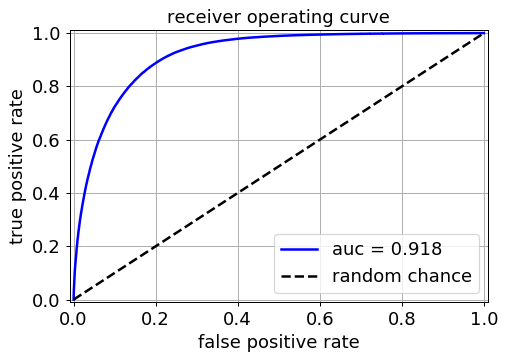

In [24]:

fpr, tpr, thresholds = roc_curve(testlabels[:,0], predict[:,0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, color='b', label='auc = %.3f' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating curve')
plt.legend(loc="lower right")
plt.savefig('ROC/'+day+'/ROC_'+variables_in_plots+'.png')
np.savez('ROC/'+day+'/ROC_'+variables_in_plots, false_pos_rate=fpr, true_pos_rate=tpr, auc=roc_auc, label=str(nVar+1)+'var')
plt.show()

In [25]:
# hist, bin_edges = np.histogram(predict[:int(len(predict)/2)])
# hist_, bin_edges_ = np.histogram(predict[:-int(len((predict)-1)/2)])
# plt.hist([predict[:int(len(predict)/2)].flatten(), predict[int(len(predict)/2)-1:-1].flatten()], label = ['ZZ', 'QCD'])
# plt.legend()
# plt.yscale('log')
# plt.show()

In [26]:
import innvestigate
import innvestigate.utils as iutils

In [33]:
best_model_wo_softmax = innvestigate.utils.keras.graph.model_wo_softmax(best_model)

In [34]:
best_model_lrp_a1b0 = innvestigate.analyzer.relevance_based.relevance_analyzer.LRPAlpha1Beta0(best_model_wo_softmax)


In [35]:
nElem = 10000


In [36]:
import time

In [37]:
batchsize = test_variables[0].shape[0]
slices = batchsize // nElem
size_from_loop = batchsize - (batchsize % nElem)
print(batchsize, slices, size_from_loop)

441390 44 440000


In [38]:
toc = time.time()


analysis_a1b0 = []
analysis_a1b0_var = []
analysis_a1b0_xv = []

for i in range(slices):
    
    analysis_a1b0_i = best_model_lrp_a1b0.analyze([element[nElem*i:nElem*(i+1)] for element in test_variables])
    analysis_a1b0.append(analysis_a1b0_i)

    
tic=time.time()
print('Elapsed Time: {0:0.2f} s'.format(tic-toc))

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Elapsed Time: 273.33 s


In [39]:
N_xv = len(expertVariables)
totalVar = len(allVariables)
analysis_a1b0_var = []
analysis_a1b0_xv = []


for i in range(totalVar):
    for s in range(slices):
        if(i > (totalVar-N_xv-1)):
#             print(analysis_a1b0[s][i].shape)
            analysis_a1b0_xv.append(analysis_a1b0[s][i])
        else:
#             print(analysis_a1b0[s][i].shape)
            analysis_a1b0_var.append(analysis_a1b0[s][i])


In [40]:
analysis_a1b0_var = np.array(analysis_a1b0_var).reshape(totalVar-N_xv, size_from_loop, 20, 1)
analysis_a1b0_xv = np.array(analysis_a1b0_xv).reshape(N_xv, size_from_loop, 1)
np.array(analysis_a1b0_xv).shape

(28, 440000, 1)

In [41]:
analysis_a1b0_last = best_model_lrp_a1b0.analyze([element[size_from_loop:] for element in test_variables])
analysis_a1b0_xv_last = []
analysis_a1b0_var_last = []

In [42]:
for i in range(totalVar):
    if(i > (totalVar-N_xv-1)):
        analysis_a1b0_xv_last.append(analysis_a1b0_last[i])
    else:
        analysis_a1b0_var_last.append(analysis_a1b0_last[i])

In [43]:
print(totalVar-N_xv)
print(np.array(analysis_a1b0_var).shape)
print(np.array(analysis_a1b0_var_last).shape)
print(np.array(analysis_a1b0_xv).shape)

17
(17, 440000, 20, 1)
(17, 1390, 20, 1)
(28, 440000, 1)


In [44]:
analysis_a1b0_full = np.append(analysis_a1b0_var, np.array(analysis_a1b0_var_last).reshape(totalVar-N_xv,(batchsize % nElem),20,1), axis=1)
analysis_a1b0_full_xv = np.append(analysis_a1b0_xv, np.array(analysis_a1b0_xv_last).reshape(N_xv,(batchsize % nElem),1), axis=1)

print(analysis_a1b0_full.shape)
print(analysis_a1b0_full_xv.shape)

(17, 441390, 20, 1)
(28, 441390, 1)


In [45]:
print(totalVar-N_xv)

17


In [70]:
xlabels = [r'log($p_T$)',
           r'$|\eta|$',
           r'log($E$)',
           r'log($p_T / p_{T_{jet}}$)',
           r'$q$',
           r'is Electron',
           r'is Photon',
           r'is Muon',
           r'is Charged Hadron',
           r'is Neutral Hadron',
           r'$\Delta \eta$',
           r'$\Delta \phi$',
           r'$\Delta R$(jet)',
           r'$\Delta R$(subjet0)',
           r'$\Delta R$(subjet1)',
           r'$d_{xy}$',
           r'$d_{z}$',
           r'Charged Hadron Multiplicity',
           r'Jet Pull Angle',
           r'$\tau_{1}^{0.5}$',
           r'$\tau_{2}^{0.5}$',
           r'$\tau_{3}^{0.5}$',
           r'$\tau_{1, SD}^{0.5}$',
           r'$\tau_{2, SD}^{0.5}$',
           r'$\tau_{3, SD}^{0.5}$',
           r'$\tau_{1}^{1.0}$',
           r'$\tau_{2}^{1.0}$',
           r'$\tau_{3}^{1.0}$',
           r'$\tau_{1, SD}^{1.0}$',
           r'$\tau_{2, SD}^{1.0}$',
           r'$\tau_{3, SD}^{1.0}$',
           r'$\tau_{1}^{1.5}$',
           r'$\tau_{2}^{1.5}$',
           r'$\tau_{3}^{1.5}$',
           r'$\tau_{1, SD}^{1.5}$',
           r'$\tau_{2, SD}^{1.5}$',
           r'$\tau_{3, SD}^{1.5}$',
           r'$\tau_{1}^{2.0}$',
           r'$\tau_{2}^{2.0}$',
           r'$\tau_{3}^{2.0}$',
           r'$\tau_{1, SD}^{2.0}$',
           r'$\tau_{2, SD}^{2.0}$',
           r'$\tau_{3, SD}^{2.0}$',
           r'$m_{jet}$',
           r'$m_{jet, SD}$',
          ]

xlabels_dict = {'jetconstPt_log': r'log($p_T$)',
'jetconstEta_abs': r'$|\eta|$',
'jetconstE_log': r'log($E$)',
'jetconstPt_Jetlog': r'log($p_T / p_{T_{jet}}$)',
'charge': r'$q$',
'isEle': r'is Electron',
'isPho': r'is Photon',
'isMuon': r'is Muon',
'isCh': r'is Charged Hadron',
'isNh': r'is Neutral Hadron',
'delta_eta': r'$\Delta \eta$',
'delta_phi': r'$\Delta \phi$',
'deltaR_jet': r'$\Delta R$(jet)',
'deltaR_subjet0': r'$\Delta R$(subjet0)',
'deltaR_subjet1': r'$\Delta R$(subjet1)',
'dxy': r'$d_{xy}$',
'dz': r'$d_{z}$',
'chMult':r'Charged Hadron Multiplicity',
'jetpull':r'Jet Pull Angle',
'tau1_b05':r'$\tau_{1}^{0.5}$',
'tau2_b05':r'$\tau_{2}^{0.5}$',
'tau3_b05':r'$\tau_{3}^{0.5}$',
'tau1_sd_b05':r'$\tau_{1, SD}^{0.5}$',
'tau2_sd_b05':r'$\tau_{2, SD}^{0.5}$',
'tau3_sd_b05':r'$\tau_{3, SD}^{0.5}$',
'tau1_b10':r'$\tau_{1}^{1.0}$',
'tau2_b10':r'$\tau_{2}^{1.0}$',
'tau3_b10':r'$\tau_{3}^{1.0}$',
'tau1_sd_b10':r'$\tau_{1, SD}^{1.0}$',
'tau2_sd_b10':r'$\tau_{2, SD}^{1.0}$',
'tau3_sd_b10':r'$\tau_{3, SD}^{1.0}$',
'tau1_b15':r'$\tau_{1}^{1.5}$',
'tau2_b15':r'$\tau_{2}^{1.5}$',
'tau3_b15':r'$\tau_{3}^{1.5}$',
'tau1_sd_b15':r'$\tau_{1, SD}^{1.5}$',
'tau2_sd_b15':r'$\tau_{2, SD}^{1.5}$',
'tau3_sd_b15':r'$\tau_{3, SD}^{1.5}$',
'tau1_b20':r'$\tau_{1}^{2.0}$',
'tau2_b20':r'$\tau_{2}^{2.0}$',
'tau3_b20':r'$\tau_{3}^{2.0}$',
'tau1_sd_b20':r'$\tau_{1, SD}^{2.0}$',
'tau2_sd_b20':r'$\tau_{2, SD}^{2.0}$',
'tau3_sd_b20':r'$\tau_{3, SD}^{2.0}$',
'jetMass':r'$m_{jet}$',
'jetMassSD':r'$m_{jet, SD}$',
}


bins_dict = {'jetconstPt_log':np.linspace(0,9,21),
 'jetconstEta_abs':np.linspace(0,5,21),
 'jetconstE_log':np.linspace(0,9,21),
 'jetconstPt_Jetlog':np.linspace(-10,3,21),
 'charge':np.linspace(-1,2,4),
 'isEle':np.linspace(0,2,3),
 'isPho':np.linspace(0,2,3),
 'isMuon':np.linspace(0,2,3),
 'isCh':np.linspace(0,2,3),
 'isNh':np.linspace(0,2,3),
 'delta_eta':np.linspace(-2,2,21),
 'delta_phi':np.linspace(-2,2,21),
 'deltaR_jet':np.linspace(0,2,21),
 'deltaR_subjet0':np.linspace(0,2,21),
 'deltaR_subjet1':np.linspace(0,2,21),
 'dxy':np.linspace(0,40000,21),  #np.linspace(0,5e-4,11), #
 'dz':np.linspace(-20000,20000,21), #np.linspace(-2.5e-5,2.5e-5,11), # 
 'tau21':np.linspace(0,1,21),
 'chMult':np.linspace(0,20,21),
 'jetpull':np.linspace(0,3.5,21),
}

bins_dict_norm = {'jetconstPt_log':np.linspace(0,1,21),
 'jetconstEta_abs':np.linspace(0,0.1,21),
 'jetconstE_log':np.linspace(0,1,21),
 'jetconstPt_Jetlog':np.linspace(0,1,21),
 'charge':np.linspace(0,1,3),
 'isEle':np.linspace(0,1,3),
 'isPho':np.linspace(0,1,3),
 'isMuon':np.linspace(0,1,3),
 'isCh':np.linspace(0,1,3),
 'isNh':np.linspace(0,1,3),
 'delta_eta':np.linspace(0.97,1.,21),
 'delta_phi':np.linspace(0.97,1.,21),
 'deltaR_jet':np.linspace(0.97,1.,21),
 'deltaR_subjet0':np.linspace(0.97,1.,21),
 'deltaR_subjet1':np.linspace(0.97,1.,21),
 'dxy':np.linspace(0,1,21),  #np.linspace(0,5e-4,11), #
 'dz':np.linspace(0,1,21), #np.linspace(-2.5e-5,2.5e-5,11), # 
 'chMult':np.linspace(0,1,21),
 'jetpull':np.linspace(0,1,21),
 'tau1_b05':np.linspace(0,1,21),
 'tau2_b05':np.linspace(0,1,21),
 'tau3_b05':np.linspace(0,1,21),
 'tau1_sd_b05':np.linspace(0,1,21),
 'tau2_sd_b05':np.linspace(0,1,21),
 'tau3_sd_b05':np.linspace(0,1,21),
 'tau1_b10':np.linspace(0,1,21),
 'tau2_b10':np.linspace(0,1,21),
 'tau3_b10':np.linspace(0,1,21),
 'tau1_sd_b10':np.linspace(0,1,21),
 'tau2_sd_b10':np.linspace(0,1,21),
 'tau3_sd_b10':np.linspace(0,1,21),
 'tau1_b15':np.linspace(0,1,21),
 'tau2_b15':np.linspace(0,1,21),
 'tau3_b15':np.linspace(0,1,21),
 'tau1_sd_b15':np.linspace(0,1,21),
 'tau2_sd_b15':np.linspace(0,1,21),
 'tau3_sd_b15':np.linspace(0,1,21),
 'tau1_b20':np.linspace(0,1,21),
 'tau2_b20':np.linspace(0,1,21),
 'tau3_b20':np.linspace(0,1,21),
 'tau1_sd_b20':np.linspace(0,1,21),
 'tau2_sd_b20':np.linspace(0,1,21),
 'tau3_sd_b20':np.linspace(0,1,21),
 'jetMass':np.linspace(0,1,21),
 'jetMassSD':np.linspace(0,1,21),
}



ylog_dict = {'jetconstPt_log':'log',
'jetconstEta_abs':'log',
'jetconstE_log':'log',
'jetconstPt_Jetlog':'log',
'charge':'linear',
'isEle':'linear',
'isPho':'linear',
'isMuon':'linear',
'isCh':'linear',
'isNh':'linear',
'delta_eta':'log',
'delta_phi':'log',
'deltaR_jet':'log',
'deltaR_subjet0':'log',
'deltaR_subjet1':'log',
'dxy':'log',
'dz':'log',
'chMult':'linear',
'jetpull':'linear',
'tau1_b05':'linear',
'tau2_b05':'linear',
'tau3_b05':'linear',
'tau1_sd_b05':'linear',
'tau2_sd_b05':'linear',
'tau3_sd_b05':'linear',
'tau1_b10':'linear',
'tau2_b10':'linear',
'tau3_b10':'linear',
'tau1_sd_b10':'linear',
'tau2_sd_b10':'linear',
'tau3_sd_b10':'linear',
'tau1_b15':'linear',
'tau2_b15':'linear',
'tau3_b15':'linear',
'tau1_sd_b15':'linear',
'tau2_sd_b15':'linear',
'tau3_sd_b15':'linear',
'tau1_b20':'linear',
'tau2_b20':'linear',
'tau3_b20':'linear',
'tau1_sd_b20':'linear',
'tau2_sd_b20':'linear',
'tau3_sd_b20':'linear',
'jetMass':'linear',
'jetMassSD':'linear',}

In [71]:
# for key, label in zip(bins_dict_norm, xlabels):
#     print("'"+key+"':r'"+label+"',")

for key in bins_dict_norm:
    print("'"+key+"':'linear',")

'jetconstPt_log':'linear',
'jetconstEta_abs':'linear',
'jetconstE_log':'linear',
'jetconstPt_Jetlog':'linear',
'charge':'linear',
'isEle':'linear',
'isPho':'linear',
'isMuon':'linear',
'isCh':'linear',
'isNh':'linear',
'delta_eta':'linear',
'delta_phi':'linear',
'deltaR_jet':'linear',
'deltaR_subjet0':'linear',
'deltaR_subjet1':'linear',
'dxy':'linear',
'dz':'linear',
'chMult':'linear',
'jetpull':'linear',
'tau1_b05':'linear',
'tau2_b05':'linear',
'tau3_b05':'linear',
'tau1_sd_b05':'linear',
'tau2_sd_b05':'linear',
'tau3_sd_b05':'linear',
'tau1_b10':'linear',
'tau2_b10':'linear',
'tau3_b10':'linear',
'tau1_sd_b10':'linear',
'tau2_sd_b10':'linear',
'tau3_sd_b10':'linear',
'tau1_b15':'linear',
'tau2_b15':'linear',
'tau3_b15':'linear',
'tau1_sd_b15':'linear',
'tau2_sd_b15':'linear',
'tau3_sd_b15':'linear',
'tau1_b20':'linear',
'tau2_b20':'linear',
'tau3_b20':'linear',
'tau1_sd_b20':'linear',
'tau2_sd_b20':'linear',
'tau3_sd_b20':'linear',
'jetMass':'linear',
'jetMassSD':'linear',


In [72]:



sig = np.argwhere(testlabels[:,0] == 1)
bkg = np.argwhere(testlabels[:,0] == 0)


In [73]:
def LRPWeights(lrp_points_sig, lrp_points_bkg, signal, background, bins):
    
    combo_sig = np.vstack((signal, lrp_points_sig)).T
    combo_bkg = np.vstack((background, lrp_points_bkg)).T
    
    combo_sig = combo_sig[combo_sig[:,0].argsort()]
    combo_bkg = combo_bkg[combo_bkg[:,0].argsort()]
    
    combo_sig_ix = np.digitize(combo_sig[:,0], bins)
    combo_bkg_ix = np.digitize(combo_sig[:,0], bins)
    
    points_sig = []
    points_bkg = []
    
    
    
    for i in range(1,len(bins)):
        
        counts_sig = len(combo_sig[:,1][np.where(combo_sig_ix == i)])
        counts_bkg = len(combo_bkg[:,1][np.where(combo_bkg_ix == i)])
        
        points_sig_norm = combo_sig[:,1][np.where(combo_sig_ix == i)].sum() / counts_sig
        points_bkg_norm = combo_bkg[:,1][np.where(combo_bkg_ix == i)].sum() / counts_bkg
        
        points_sig_norm = np.average(combo_sig[:,1][np.where(combo_sig_ix == i)])
        points_bkg_norm = np.average(combo_bkg[:,1][np.where(combo_bkg_ix == i)])
        
        points_sig.append(points_sig_norm)
        points_bkg.append(points_bkg_norm)
        
        
    return points_sig, points_bkg
    
    

In [74]:
def HidePadding(variable_sig, variable_bkg, weights_sig, weights_bkg, pad):

    mask_sig = (variable_sig != pad)
    mask_bkg = (variable_bkg != pad)
    
    variable_sig = variable_sig[mask_sig]
    weights_sig  = weights_sig[mask_sig]
    variable_bkg = variable_bkg[mask_bkg]
    weights_bkg  = weights_bkg[mask_bkg]
    
    newsize = np.min([variable_sig.shape[0], variable_bkg.shape[0]])
    
    sigsize = variable_sig.shape[0] - newsize
    bkgsize = variable_bkg.shape[0] - newsize
    
    variable_sig = variable_sig[sigsize:]
    weights_sig  = weights_sig[sigsize:]
    variable_bkg = variable_bkg[bkgsize:]
    weights_bkg  = weights_bkg[bkgsize:]
    
    return variable_sig, variable_bkg, weights_sig, weights_bkg
    
    

In [75]:
def HidePaddingHist(variable_sig, variable_bkg, pad):
    

    mask_sig = (variable_sig != pad)
    mask_bkg = (variable_bkg != pad)
    
    if(pad == 0.99):
        
        mask_sig = (variable_sig < pad)
        mask_bkg = (variable_bkg < pad)
        
    
    variable_sig = variable_sig[mask_sig]
    variable_bkg = variable_bkg[mask_bkg]
    
    newsize = np.min([variable_sig.shape[0], variable_bkg.shape[0]])
    
    sigsize = variable_sig.shape[0] - newsize
    bkgsize = variable_bkg.shape[0] - newsize
    
    variable_sig = variable_sig[sigsize:]
    variable_bkg = variable_bkg[bkgsize:]
    
    return variable_sig, variable_bkg

In [76]:
# varCount = 0
# Nbins = 50
# ymax = []
# c = 299792458


# for var in allVariables:
    
#     axes = []

#     hidePadding=False

#     dplots = ('dxy' in var ) or ('dz' in var)
#     multplot = ('is' in var)

    
#     fig = plt.figure(figsize=(5.25, 5)) 
#     gs = gridspec.GridSpec(2, 1, height_ratios=[3.5, 1.5])
#     axes.append(plt.subplot(gs[0]))
#     axes.append(plt.subplot(gs[1]))
    
#     axes[1].set_xlabel(xlabels_dict[var])
#     axes[0].set_xlabel(None)
#     axes[1].set_ylabel('Relevance')
#     axes[0].set_ylabel('Counts')
    
    
#     signal = test_variables[varCount][sig].flatten()
#     background = test_variables[varCount][bkg].flatten()

#     lrp_points_sig = analysis_a1b0_full[varCount][sig].reshape(441844//2, 20).flatten()
#     lrp_points_bkg = analysis_a1b0_full[varCount][bkg].reshape(441844//2, 20).flatten()

    
#     pad = 0.
#     if (varCount==0 or varCount==2 or varCount==3):
#         hidePadding = True
    
#     if varCount==1:
#         hidePadding = True
#         pad = 99.
    
#     if(hidePadding):   
#         signal, background, lrp_points_sig, lrp_points_bkg = HidePadding(signal, background, lrp_points_sig, lrp_points_bkg, pad)

#     hist_sig, points_sig, points_bkg = LRPWeights(lrp_points_sig, lrp_points_bkg, signal, background, bins_dict[var])
    
    
# #     if(dplots):
# #         signal = signal / c
# #         background = background / c
    
    
#     hist_sig = axes[0].hist(signal, bins=bins_dict[var], label='ZZ', alpha=0.5)
#     hist_bkg = axes[0].hist(background, bins=bins_dict[var], label='QCD', alpha=0.5)
    
#     axes[0].set_yscale('log')
#     axes[0].set_ylim([1e-2, None])
#     axes[0].legend()
    
#     ymax.append(np.max([np.max(np.array(points_sig)), np.max(np.array(points_bkg))]))
#     axes[1].plot(hist_sig[1][1:], points_sig, 'o', label='ZZ', alpha=0.5)
#     axes[1].plot(hist_sig[1][1:], points_bkg, 'o', label='QCD', alpha=0.5)
#     if (dplots): 
#         axes[0].set_xticklabels(['{0:.0e}'.format(tick).replace('0e+00','0') for tick in axes[0].get_xticks()])
#         axes[1].set_xticklabels(['{0:.0e}'.format(tick).replace('0e+00','0') for tick in axes[0].get_xticks()])
#     axes[1].set_ylim([-0.01, 0.35])
#     axes[1].set_xlim(axes[0].get_xlim())
#     if(multplot):
#         axes[0].set_xticklabels(['', '', 0,'',1,''])
#         axes[1].set_xticks([-1.5,-0.5])
#         axes[1].set_xticklabels([0, 1])
#         axes[0].set_ylim([1.0, 1e7])
        
#     if('charge' in var):
#         axes[0].set_xticklabels(['', '', -1,'',0,'',1,''])
#         axes[1].set_xticks([-0.5,0.5,1.5])
#         axes[1].set_xticklabels(['', '', -1, '',0,'',1,''])
#         axes[0].set_ylim([1.0, 1e7])
    

#     fig.tight_layout()
#     print(var)
#     plt.savefig('LRP/'+day+'/LRP_'+var+'_flat.png')
    
#     varCount += 1
    
    
    

## Histograms Only

In [87]:
if(PlotHistogramsOnly):
    varCount = 0

    for var in allVariables:
        



        hidePadding=False

        dplots = ('dxy' in var ) or ('dz' in var)
        multplot = ('is' in var)


        plt.xlabel(xlabels_dict[var])
        plt.ylabel('Counts')


        signal = test_variables[varCount][sig].flatten()
        background = test_variables[varCount][bkg].flatten()

        


        pad = 0.
        if (varCount==0 or varCount==2):
            hidePadding = True

        if (varCount==1 or varCount==3 or varCount==10 or varCount==11 or varCount==12 or varCount==13 or varCount==14):
            hidePadding = True
            pad = 0.99

        if(hidePadding):   
            signal, background = HidePaddingHist(signal, background, pad)

#         hist_sig, points_sig, points_bkg = LRPWeights(lrp_points_sig, lrp_points_bkg, signal, background, bins_dict[var])

        
        
#         hist_sig = plt.hist(signal, bins=bins_dict[var], label='ZZ', alpha=0.5)
#         hist_bkg = plt.hist(background, bins=bins_dict[var], label='QCD', alpha=0.5)
        
        hist_sig = plt.hist(signal, bins=bins_dict_norm[var], label='ZZ', alpha=0.5).scale(1./signal.flatten.sum())
        hist_bkg = plt.hist(background, bins=bins_dict_norm[var], label='QCD', alpha=0.5).scale(1./background.flatten.sum())

        plt.yscale(ylog_dict[var])
        plt.ylim([1e-2, None])
        plt.legend()


#         if (dplots): 
#             plt.xticks([tick for tick in plt.xticks()[0]], ['{0:.0e}'.format(tick) for tick in plt.xticks()[0]])

        if(multplot):
            plt.xticks([0.5, 1.5]/1.5, ['0','1'])
            plt.ylim([1.0, 1e7])

        if('charge' in var):
            plt.xticks([-0.5, 0.5, 1.5]/1.5, ['-1','0','1'])
            plt.ylim([1.0, 1e7])


        plt.tight_layout()
        print(var, varCount)
        plt.savefig('LRP/'+day+'/Hist_'+var+'.png')
        plt.show()

        varCount += 1

        
        

## New LRP Plots

In [78]:
from scipy import stats

In [79]:
def make_profile_data(x,values,bins):

    
    bin_mean, bin_edges, _ = stats.binned_statistic(x,
                                                    values,
                                                    statistic = 'mean',
                                                    bins = bins)
    bin_std, _, _ = stats.binned_statistic(x,
                                           values,
                                           statistic = 'std',
                                           bins = bins)
    bin_count, _, _ = stats.binned_statistic(x,
                                             x,
                                             statistic = 'count',
                                             bins = bins)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    return bin_mean, bin_std, bin_count, bin_edges, bin_centers, bin_width

In [80]:
shape = analysis_a1b0_full_xv.shape
shape2 = analysis_a1b0_full.shape
print(shape[1])
print(shape2[1])

441390
441390


jetconstPt_log


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


jetconstEta_abs
jetconstE_log
jetconstPt_Jetlog
charge
isEle
isPho
isMuon
isCh
isNh
delta_eta
delta_phi
deltaR_jet
deltaR_subjet0
deltaR_subjet1
dxy
dz
chMult
jetpull
tau1_b05


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


tau2_b05
tau3_b05
tau1_sd_b05
tau2_sd_b05
tau3_sd_b05
tau1_b10
tau2_b10
tau3_b10
tau1_sd_b10
tau2_sd_b10
tau3_sd_b10
tau1_b15
tau2_b15
tau3_b15
tau1_sd_b15
tau2_sd_b15
tau3_sd_b15
tau1_b20
tau2_b20
tau3_b20
tau1_sd_b20
tau2_sd_b20
tau3_sd_b20
jetMass
jetMassSD


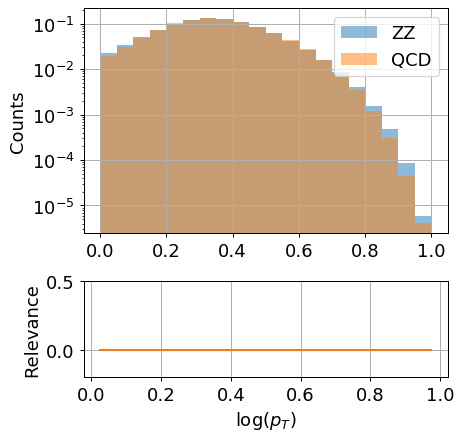

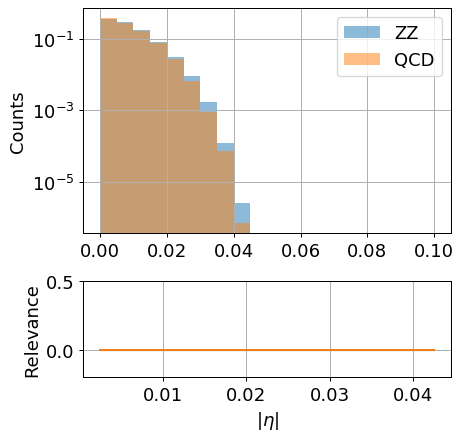

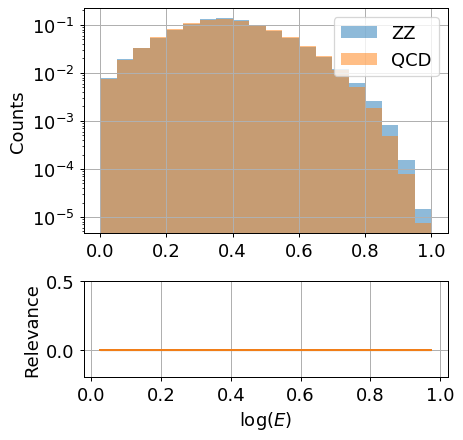

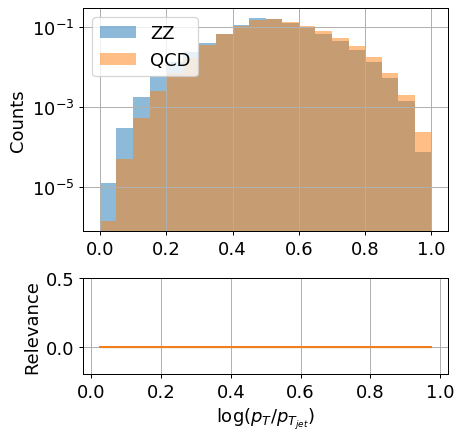

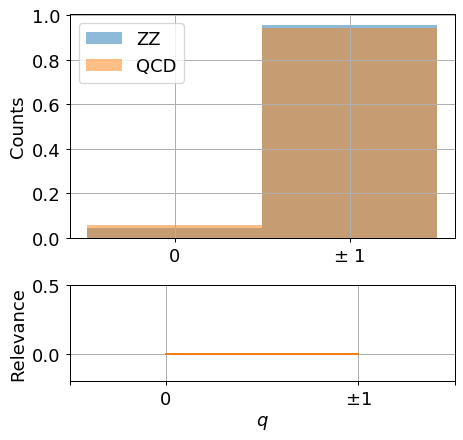

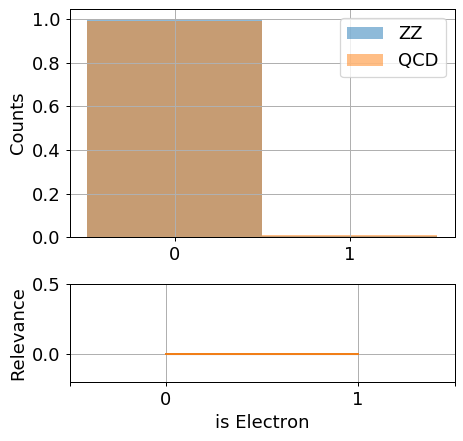

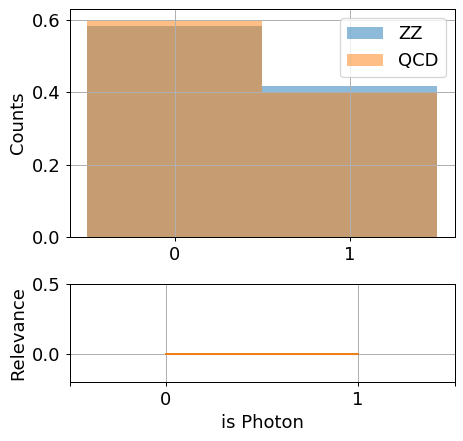

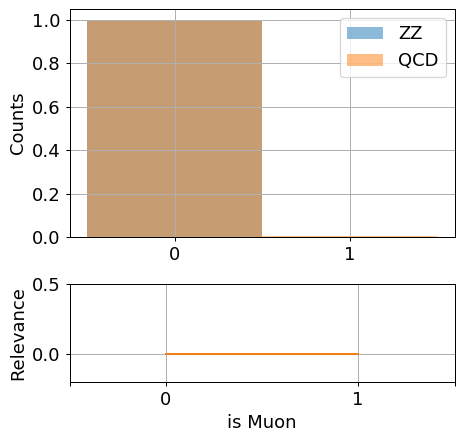

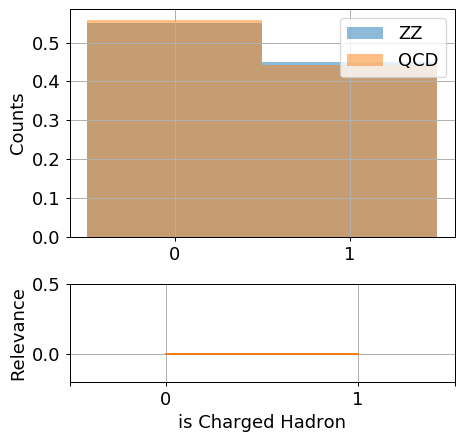

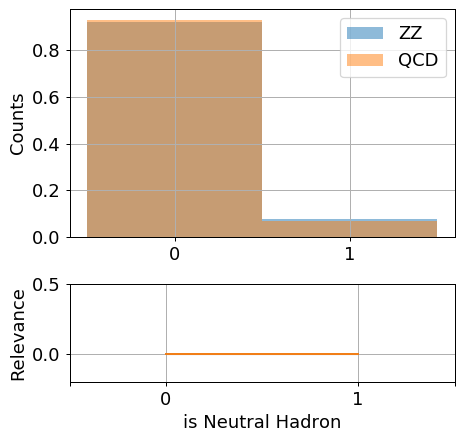

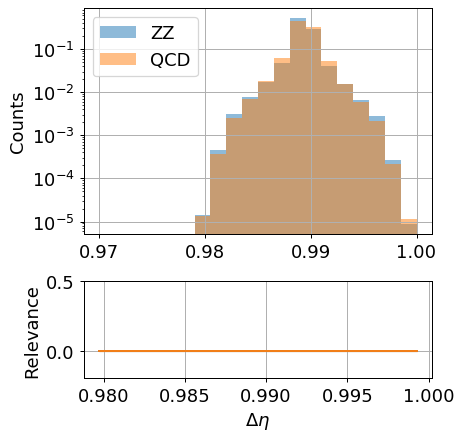

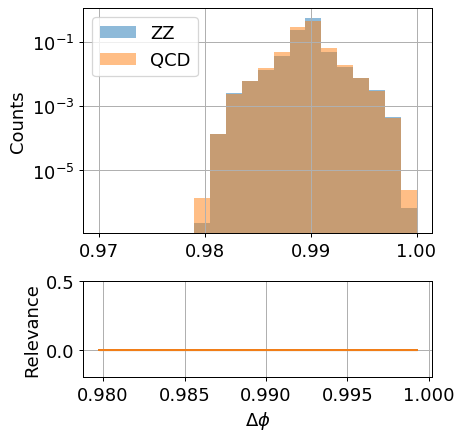

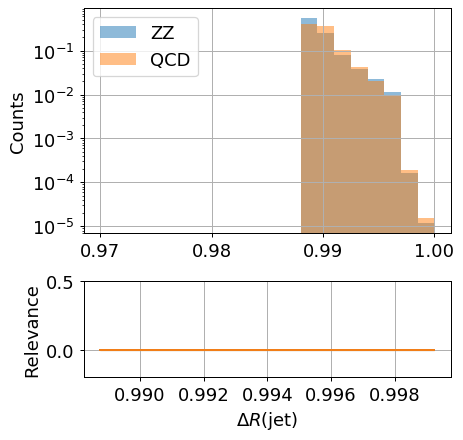

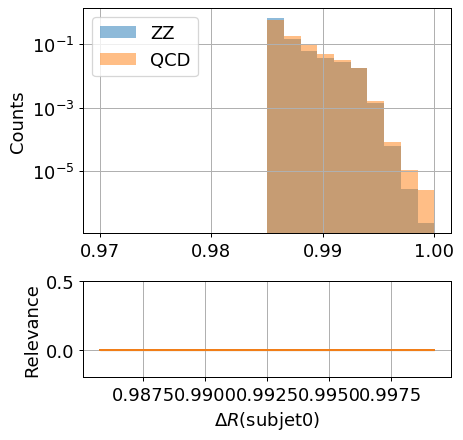

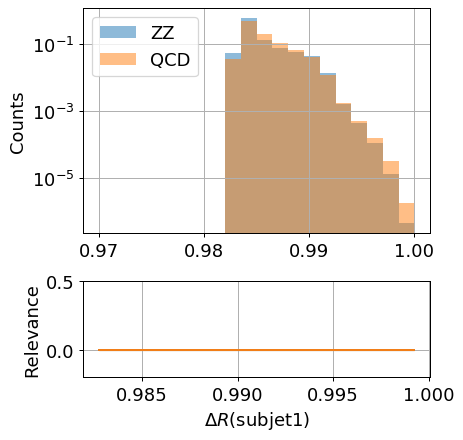

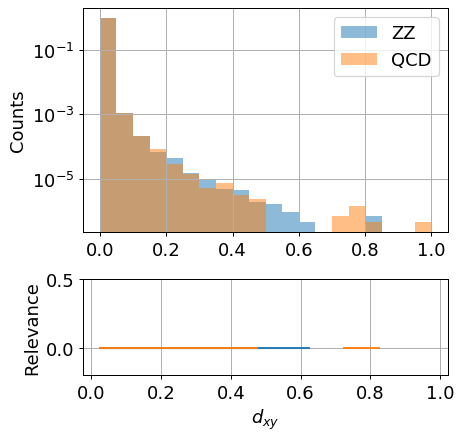

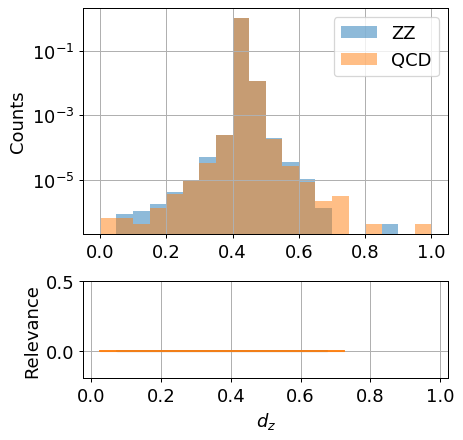

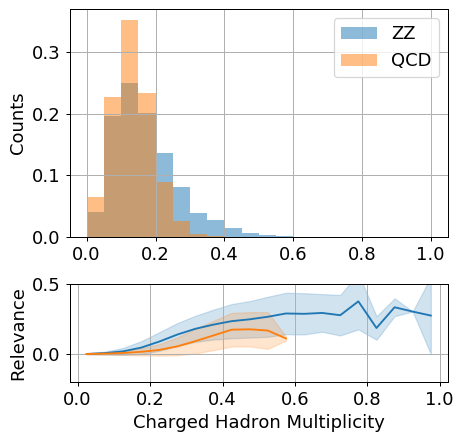

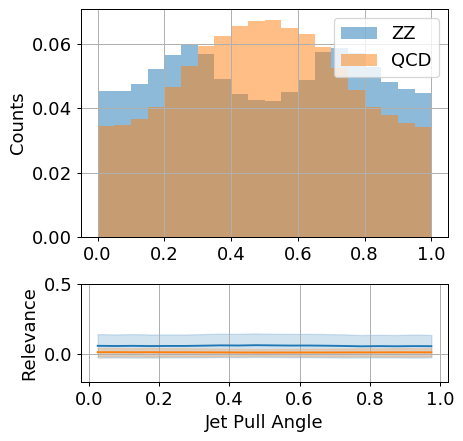

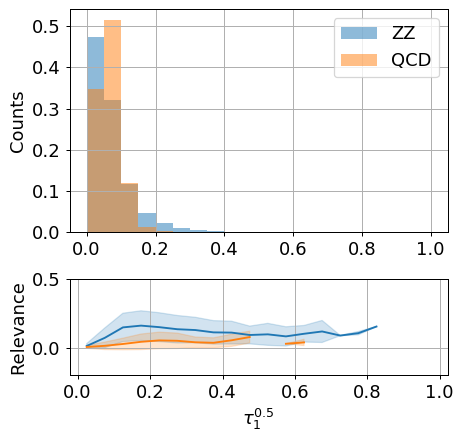

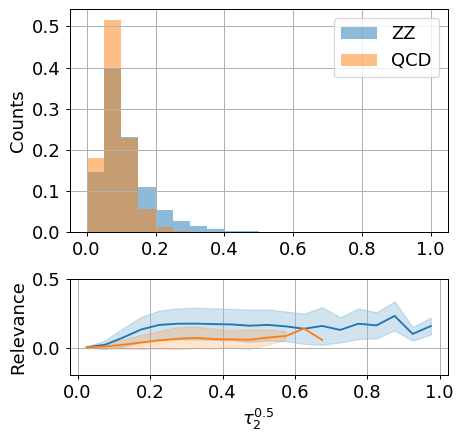

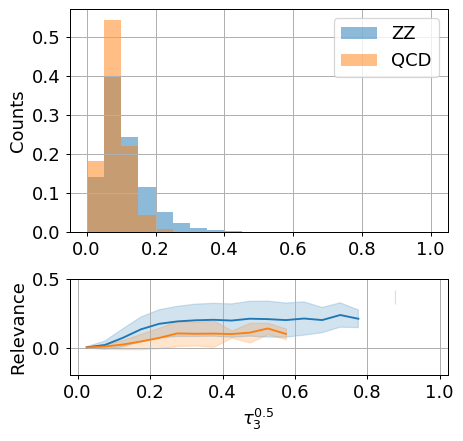

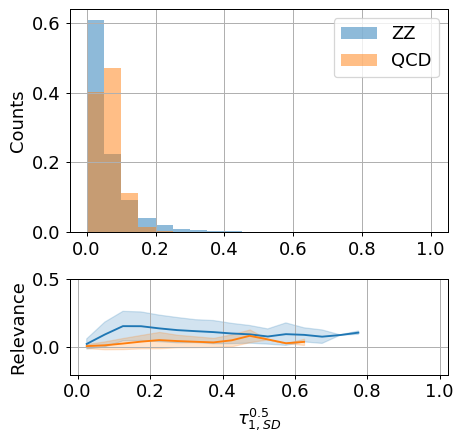

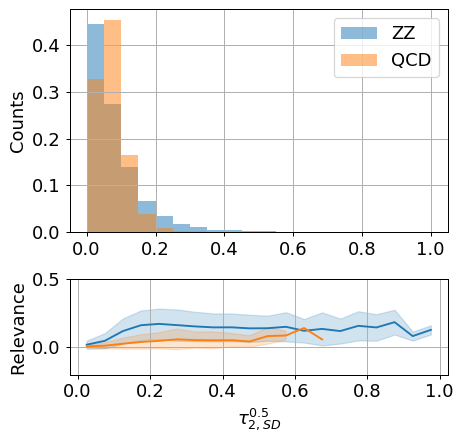

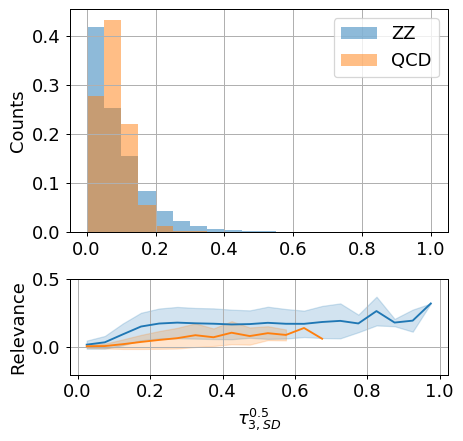

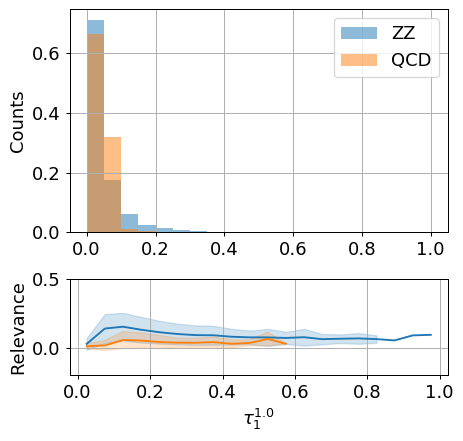

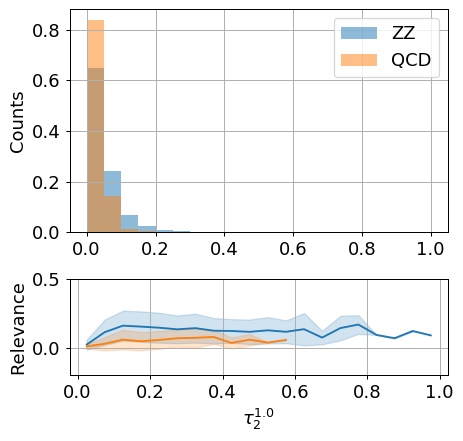

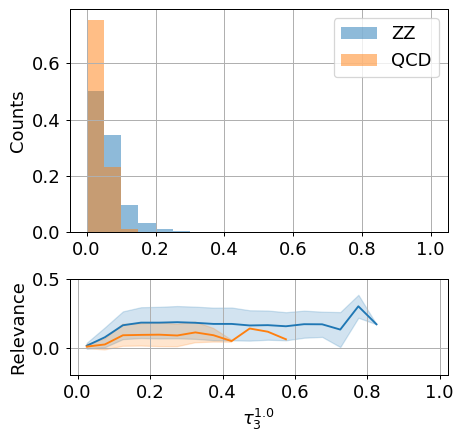

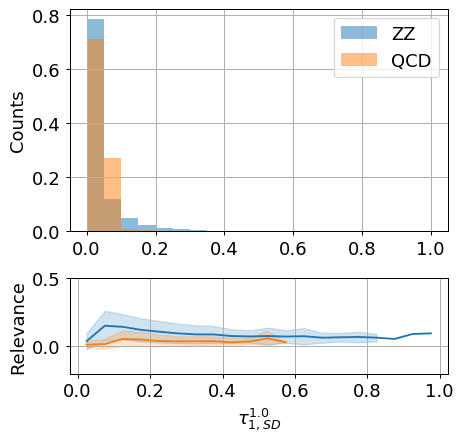

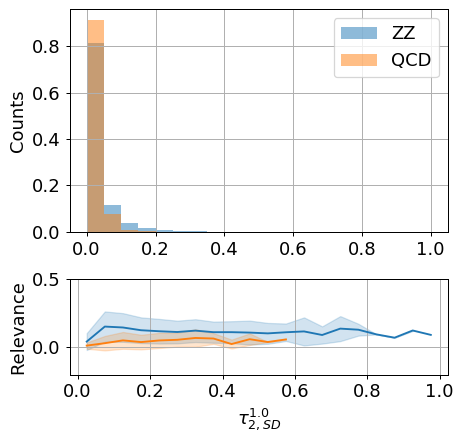

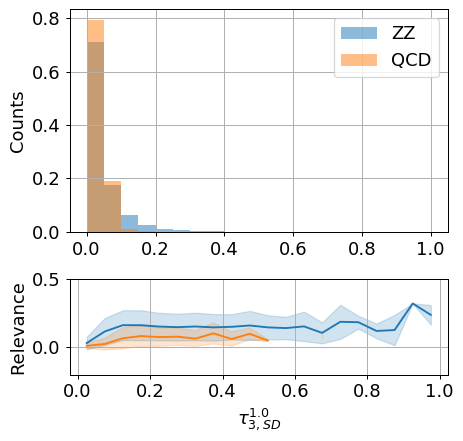

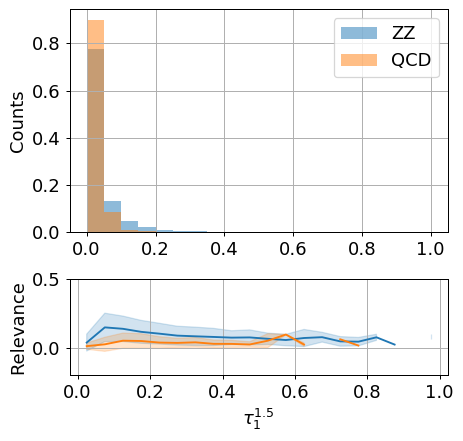

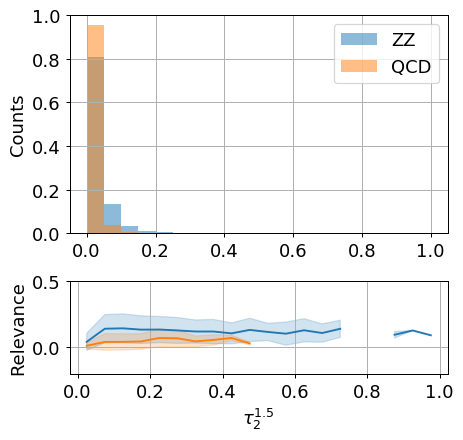

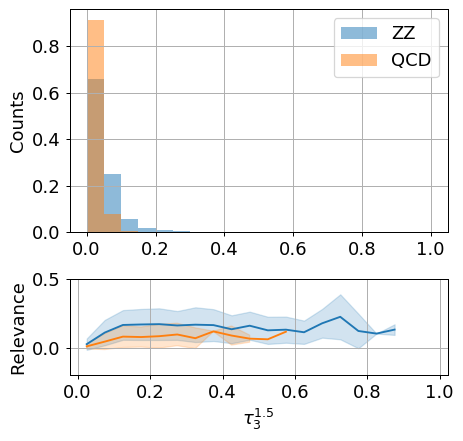

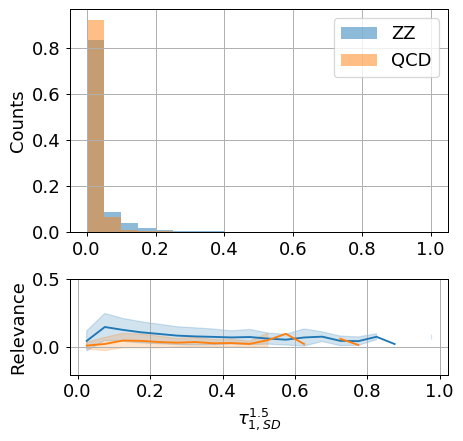

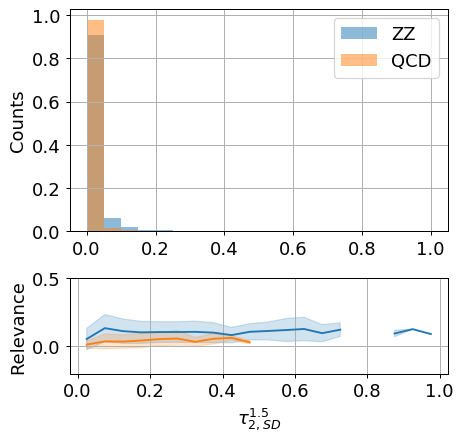

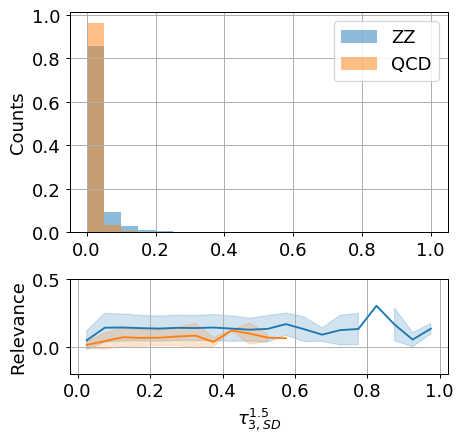

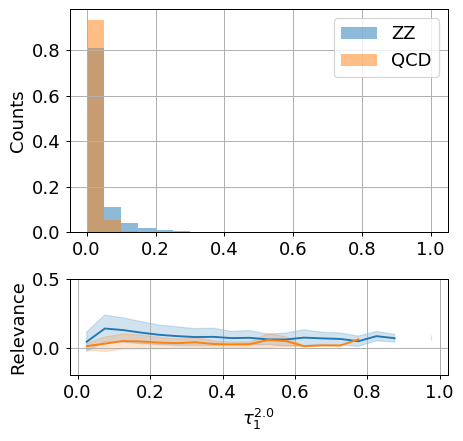

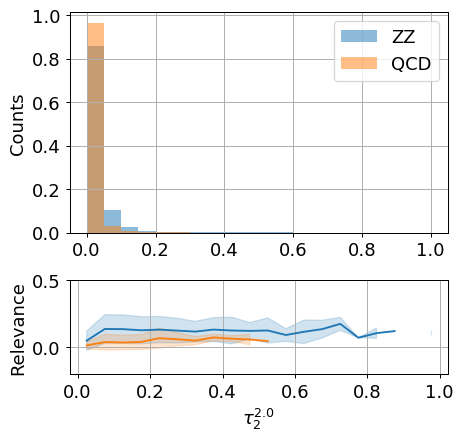

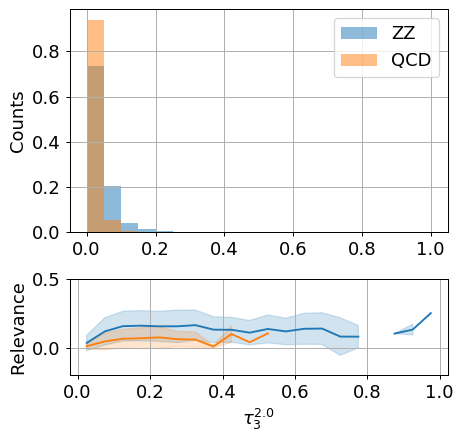

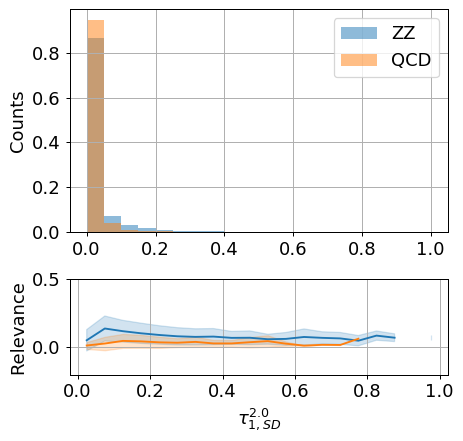

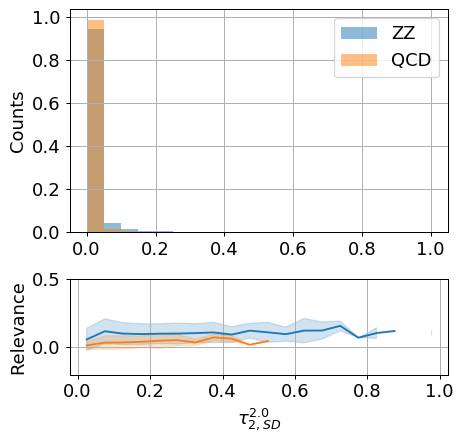

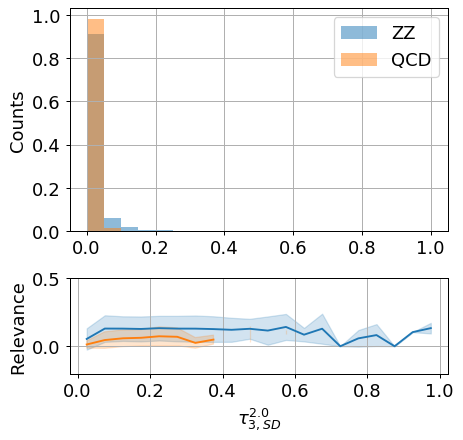

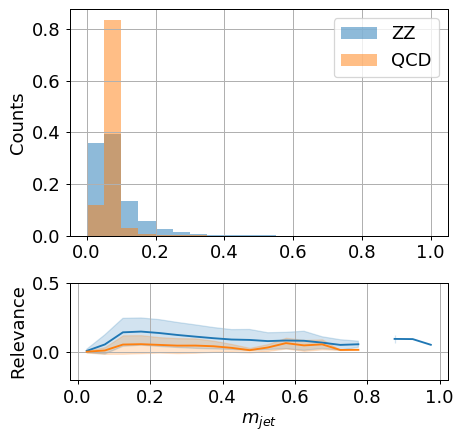

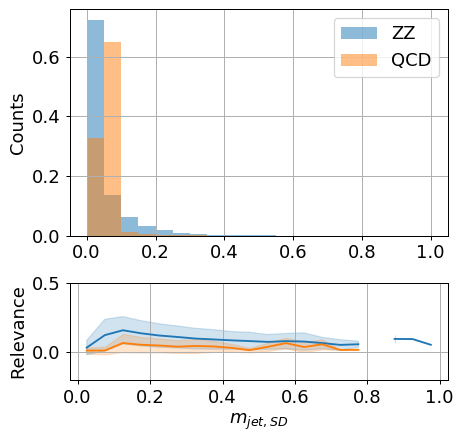

In [117]:
varCount = 0
LRPindex = 0
Nbins = 50
ymax = []

for var in allVariables:

    
    dplots = ('dxy' in var ) or ('dz' in var)
    multplot = ('is' in var)
    qplot = ('charge' in var)
    deltaplots = ('delta' in var)
    

    bins_dict = bins_dict_norm
    
    isXV = ((totalVar-N_xv)-1 < varCount)
    if((totalVar-N_xv)-1 == varCount): index = 0
    
    if(isXV):
        LRP_Analysis = analysis_a1b0_full_xv
        shape = analysis_a1b0_full_xv.shape
        newshape = (shape[1]//2, 1)
    else:
        LRP_Analysis = analysis_a1b0_full
        shape = analysis_a1b0_full.shape
        newshape = (shape[1]//2, 20)
    
    axes = []

    hidePadding=False

    
    fig = plt.figure(figsize=(5.25, 5)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[3.5, 1.5])
    axes.append(plt.subplot(gs[0]))
    axes.append(plt.subplot(gs[1]))
    
    axes[1].set_xlabel(xlabels_dict[var])
    axes[0].set_xlabel(None)
    axes[1].set_ylabel('Relevance')
    axes[0].set_ylabel('Counts')
    
    
    signal = test_variables[varCount][sig].flatten()
    background = test_variables[varCount][bkg].flatten()
    
    
    lrp_points_sig = LRP_Analysis[LRPindex][sig].reshape(newshape).flatten()
    lrp_points_bkg = LRP_Analysis[LRPindex][bkg].reshape(newshape).flatten()
    
    remove_sig = np.abs(lrp_points_sig) < 100000000
    remove_bkg = np.abs(lrp_points_bkg) < 100000000
    remove = remove_sig
    if len(remove_bkg) > len(remove_sig): remove=remove_bkg
    

    lrp_points_sig = lrp_points_sig[remove_sig]
    lrp_points_bkg = lrp_points_bkg[remove_bkg]
    
    signal = signal[remove_sig]
    background = background[remove_bkg]


    
    pad = 0.
    if (varCount==0 or varCount==2):
        hidePadding = True
        
    if varCount==3:
        hidePadding = True
        pad = 1.
        
    
    if varCount==1:
        hidePadding = True
        pad = 99.
    
    if(hidePadding):   
        signal, background, lrp_points_sig, lrp_points_bkg = HidePadding(signal, background, lrp_points_sig, lrp_points_bkg, pad)

    points_sig, points_bkg = LRPWeights(lrp_points_sig, lrp_points_bkg, signal, background, bins_dict[var])
    
    
#     if(dplots):
#         signal = signal / c
#         background = background / c


    weights_sig = np.ones_like(signal)*(1./len(signal.flatten()))
    weights_bkg = np.ones_like(background)*(1./len(background.flatten()))
    
    
    hist_sig = axes[0].hist(signal, bins=bins_dict[var], label='ZZ', alpha=0.5, weights=weights_sig)
    hist_bkg = axes[0].hist(background, bins=bins_dict[var], label='QCD', alpha=0.5, weights=weights_bkg)
    

    
    
    
    
    bin_mean_sig, bin_std_sig, bin_count_sig, bin_edges, bin_centers, bin_width = \
    make_profile_data(signal, lrp_points_sig, bins_dict[var])
    
    
#     print(np.argwhere(bin_std_sig > 2))
    
#     xmin = bin_centers[10] - bin_width
#     xmax = bin_centers[10] + bin_width
    
#     miniarray = lrp_points_sig[(signal > xmin) & (signal < xmax)]
#     print(np.max(miniarray))
#     print(np.min(miniarray))
#     print(np.std(miniarray))
    
#     print(len(lrp_points_sig[np.abs(lrp_points_sig) > 100]))
#     print(lrp_points_sig[np.abs(lrp_points_sig) > 1])
    
    bin_mean_bkg, bin_std_bkg, bin_count_bkg, _, _, _  = make_profile_data(background, lrp_points_bkg, bins_dict[var])
    
    axes[0].set_yscale(ylog_dict[var])
    #axes[0].set_ylim([-1e-1, 1.1])
    axes[0].legend()
    
    ymax.append(np.max([np.max(np.array(points_sig)), np.max(np.array(points_bkg))]))
    
    
    # Plot LRP Weights #
    
    axes[1].plot(bin_centers, bin_mean_sig)
    axes[1].plot(bin_centers, bin_mean_bkg)
    
    axes[1].fill_between(bin_centers, bin_mean_sig - bin_std_sig, bin_mean_sig + bin_std_sig, color='C0', alpha = 0.2)
    axes[1].fill_between(bin_centers, bin_mean_bkg - bin_std_bkg, bin_mean_bkg + bin_std_bkg, color='C1', alpha = 0.2)

    
#     if (dplots): 
#         axes[0].set_xticklabels(['{0:.0e}'.format(tick).replace('0e+00','0') for tick in axes[0].get_xticks()])
#         axes[1].set_xticklabels(['{0:.0e}'.format(tick).replace('0e+00','0') for tick in axes[0].get_xticks()])
#     axes[1].set_ylim([-0.1, 0.5])
#     axes[1].set_xlim(axes[0].get_xlim())
#     if(multplot):
#         axes[0].set_xticklabels(['', '', 0,'',1,''])
#         axes[1].set_xticklabels(['', '', 0, '',1,'',''])
#         axes[0].set_ylim([1.0, 1e7])

    if(qplot):
        axes[0].set_xticks([0.25, 0.75])
        axes[0].set_xticklabels(['0',r'$\pm$ 1'])
        axes[1].set_xticks([0, 0.25, 0.75, 1])
        axes[1].set_xticklabels(['','0',r'$\pm $1',''])
       # axes[0].set_ylim([1.0, 1e7])
        
    if(multplot):
        axes[0].set_xticks([0.25, 0.75])
        axes[0].set_xticklabels(['0','1'])
        axes[1].set_xticks([0, 0.25, 0.75, 1])
        axes[1].set_xticklabels(['','0','1',''])
        #axes[0].set_ylim([1.0, 1e7])
        
#     if('charge' in var):
#         axes[0].set_xticks([-0.5/1.5,0.5/1.5,1.5/1.5])
#         axes[0].set_xticklabels(['-1','0','1'])
#         axes[1].set_xticks([-0.5/1.5,0.5/1.5,1.5/1.5])
#         axes[1].set_xticklabels(['-1','0','1'])
#         axes[0].set_ylim([1.0, 1e7])
    
    
    axes[1].set_ylim([-0.2, 0.5])

    fig.tight_layout()

    plt.savefig('LRP/'+day+'/LRP_'+var+'_unc.png')
    
    print(var)
    
    varCount += 1
    LRPindex = 0
    
    
    

In [82]:
ymax

[0.0,
 nan,
 0.0,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.3789320426142734,
 0.06521349366915108,
 nan,
 0.23313283314928412,
 nan,
 nan,
 0.18407342657446862,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.3211999535560608,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.30367884039878845,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.1753646433353424,
 nan,
 nan]

In [ ]:
import matplotlib

In [ ]:
cmap = matplotlib.cm.get_cmap('Pastel1')
cmap = matplotlib.cm.get_cmap('prism')
#cmap = matplotlib.cm.get_cmap('Set3')
cmap_xv = matplotlib.cm.get_cmap('tab10')
cmap_xv = matplotlib.cm.get_cmap('Dark2')

In [ ]:
len(analysis_a1b0_full_xv)

In [ ]:
color_ix = np.append(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
Xcolor_ix = np.linspace(0,1,3)

In [ ]:

kinematics = []
multandcharge = []
deltaplots = []
others = []
experts = []



hist_bins = np.linspace(0, 2, 51)
varCount = 0
expCount = 0
for lrp_score in analysis_a1b0_full:
    hist = np.histogram(lrp_score.flatten(), hist_bins)
    
    if(varCount < 4):
        kinematics.append(hist)
        print(hist)
    elif(varCount < 10):
        multandcharge.append(hist)
    elif(varCount < 15):
        deltaplots.append(hist)
    else:
        others.append(hist)
    
    varCount += 1

for lrp_score in analysis_a1b0_full_xv:
    hist = np.histogram(lrp_score.flatten(), hist_bins)
    experts.append(hist)
    expCount += 1
    


In [ ]:
lt = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

In [ ]:
lt[7][1]

In [ ]:
linestyles = [lt[5][1], 'dashdot', lt[0][1], lt[7][1], lt[-3][1]] + [lt[5][1], 'dashdot', lt[0][1], lt[-2][1], lt[-3][1]] + [lt[5][1], 'dashdot', lt[0][1], lt[-2][1], lt[-3][1]] + [lt[5][1], 'dashdot', lt[0][1], lt[-2][1], lt[-3][1]]
Xlinestyles = ['-', lt[-1][1], 'dotted']
Xlw = [3,3,3]

print(len(linestyles))

In [ ]:
plot_size = (9,4)

varCount = 0
expCount = 0
start = totalVar - N_xv
fig = plt.figure(0, figsize = plot_size)
ax  = fig.add_subplot(111)
for hist in kinematics:
    
    counts, bins = hist
    
    ax.plot(bins[:-1], counts, ls=linestyles[varCount], lw=3, color=cmap(color_ix[varCount]), label=xlabels[varCount])
    #color=cmap(color_ix[varCount]
    #ax.legend(loc='best', bbox_to_anchor=(1.02, 1.02, 0.0, 0.0))
    #ax.set_yscale('log')
    ax.set_ylim([1e0,20000])
    ax.set_ylabel('Counts')
    ax.set_xlabel('Relevance')
    ax.set_position([0.1,0.1,0.5,0.8])
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.), fontsize='small')
    varCount += 1

for hist in experts:
    
    counts, bins = hist
    
    ax.plot(bins[:-1], counts, ls=Xlinestyles[expCount], lw=Xlw[expCount], 
           color=cmap_xv(Xcolor_ix[expCount]) , label=xlabels[start+expCount]) #color=cmap_xv(Xcolor_ix[expCount])
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.), fontsize='large')

    expCount += 1

fig.tight_layout()

fig.savefig('LRP/LRP_hist/'+day+'/LRP_hist_kinematics.png', bbox_inches='tight')  
plt.show()


\![](LRP_hist_kinematics.png)

In [ ]:
expCount = 0
fig = plt.figure(0, figsize = plot_size)
ax  = fig.add_subplot(111)
for hist in multandcharge:
    
    counts, bins = hist
    
    ax.plot(bins[:-1], counts, ls=linestyles[varCount], lw=3, color=cmap(color_ix[varCount]), label=xlabels[varCount])
    #color=cmap(color_ix[varCount]
    ax.legend(loc='best', bbox_to_anchor=(1.02, 1.02, 0.0, 0.0))
    #ax.set_yscale('log')
    ax.set_ylim([1e0,20000])
    ax.set_ylabel('Counts')
    ax.set_xlabel('Relevance')
    ax.set_position([0.1,0.1,0.5,0.8])
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.))
    varCount += 1

for hist in experts:
    
    counts, bins = hist
    
    ax.plot(bins[:-1], counts, ls=Xlinestyles[expCount], lw=Xlw[expCount], 
           color=cmap_xv(Xcolor_ix[expCount]) , label=xlabels[start+expCount]) #color=cmap_xv(Xcolor_ix[expCount]    
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.))

    expCount += 1

fig.tight_layout()

fig.savefig('LRP/LRP_hist/'+day+'/LRP_hist_multandcharge.png', bbox_inches='tight')    
plt.show()

In [ ]:
expCount = 0
fig = plt.figure(0, figsize = plot_size)
ax  = fig.add_subplot(111)
for hist in deltaplots:
    
    counts, bins = hist
    
    ax.plot(bins[:-1], counts, ls=linestyles[varCount], lw=3, color=cmap(color_ix[varCount]), label=xlabels[varCount])
    #color=cmap(color_ix[varCount]
    #ax.legend(loc='best', bbox_to_anchor=(1.02, 1.02, 0.0, 0.0))
    #ax.set_yscale('log')
    ax.set_ylim([1e0,20000])
    ax.set_ylabel('Counts')
    ax.set_xlabel('Relevance')
    ax.set_position([0.1,0.1,0.5,0.8])
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.))
    varCount += 1

for hist in experts:
    
    counts, bins = hist
    
    ax.plot(bins[:-1], counts, ls=Xlinestyles[expCount], lw=Xlw[expCount], 
           color=cmap_xv(Xcolor_ix[expCount]) , label=xlabels[start+expCount]) #color=cmap_xv(Xcolor_ix[expCount] 
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.))

    expCount += 1

fig.tight_layout()

fig.savefig('LRP/LRP_hist/'+day+'/LRP_hist_deltaplots.png', bbox_inches='tight')    
plt.show()

In [ ]:
expCount = 0
fig = plt.figure(0, figsize = plot_size)
ax  = fig.add_subplot(111)
for hist in others:
    
    counts, bins = hist
    
    ax.plot(bins[:-1], counts, ls=linestyles[varCount], lw=3, color=cmap(color_ix[varCount]), label=xlabels[varCount])
    #color=cmap(color_ix[varCount]
    #ax.legend(loc='best', bbox_to_anchor=(1.02, 1.02, 0.0, 0.0))
    #ax.set_yscale('log')
    ax.set_ylim([1e0,20000])
    ax.set_ylabel('Counts')
    ax.set_xlabel('Relevance')
    ax.set_position([0.1,0.1,0.5,0.8])
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.))
    varCount += 1

for hist in experts:
    
    counts, bins = hist
    
    ax.plot(bins[:-1], counts, ls=Xlinestyles[expCount], lw=Xlw[expCount], 
           color=cmap_xv(Xcolor_ix[expCount]) , label=xlabels[start+expCount]) #color=cmap_xv(Xcolor_ix[expCount] 
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.))

    expCount += 1

fig.tight_layout()

fig.savefig('LRP/LRP_hist/'+day+'/LRP_hist_dxdy.png', bbox_inches='tight')    
plt.show()

In [ ]:
expCount = 0
start = totalVar - N_xv
fig = plt.figure(0, figsize = plot_size)
ax  = fig.add_subplot(111)

for hist in experts:
    
    counts, bins = hist
    
    ax.plot(bins[:-1], counts, ls=Xlinestyles[expCount], lw=Xlw[expCount], 
    color=cmap_xv(Xcolor_ix[expCount]) , label=xlabels[start+expCount]) #color=cmap_xv(Xcolor_ix[expCount] 
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.))
    #plt.yscale('log')
    ax.set_ylim([1e0, 20000])
    ax.set_ylabel('Counts')
    ax.set_xlabel('Relevance')


    expCount += 1

# fig.tight_layout()

fig.savefig('LRP/LRP_hist/'+day+'/LRP_hist_experts.png', bbox_inches='tight')    
plt.show()

In [ ]:
expCount = 0
start = totalVar - N_xv
fig = plt.figure(0, figsize = plot_size)
ax  = fig.add_subplot(111)

for hist in experts:
    
    counts, bins = hist
    
    print(counts.sum())
    histo = np.zeros((4))
    histo[expCount] = counts.sum()
    print(histo)
    
    plt.hist(histo, bins=[0, 1, 2, 3])
    
    
    #ax.plot(bins[:-1], counts, ls=Xlinestyles[expCount], lw=Xlw[expCount],
    #color=cmap_xv(Xcolor_ix[expCount]) , label=xlabels[start+expCount]) #color=cmap_xv(Xcolor_ix[expCount] 
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.))
    #plt.yscale('log')
    ax.set_ylim([1e0, 20000])
    ax.set_ylabel('Counts')
    ax.set_xlabel('Relevance')


    expCount += 1

In [ ]:
varCount=0
expCount = 0
fig = plt.figure(0, figsize = plot_size)
ax  = fig.add_subplot(111)
for hist in kinematics+multandcharge+deltaplots+others:
    
    counts, bins = hist
    
    ax.plot(bins[:-1], counts, ls=linestyles[varCount], lw=3, color=cmap(color_ix[varCount]), label=xlabels[varCount])
    #color=cmap(color_ix[varCount]
    #ax.legend(loc='best', bbox_to_anchor=(1.02, 1.02, 0.0, 0.0))
    #ax.set_yscale('log')
    ax.set_ylim([1e0,20000])
    ax.set_ylabel('Counts')
    ax.set_xlabel('Relevance')
    ax.set_position([0.1,0.1,0.5,0.8])
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.))
    varCount += 1

for hist in experts:
    
    counts, bins = hist
    
    ax.plot(bins[:-1], counts, ls=Xlinestyles[expCount], lw=Xlw[expCount], 
           color=cmap_xv(Xcolor_ix[expCount]), label=xlabels[start+expCount]) #color=cmap_xv(Xcolor_ix[expCount] 
    leg = ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1.02, 0., 0.))


    expCount += 1

# fig.tight_layout()

fig.savefig('LRP/LRP_hist/'+day+'/LRP_hist_everything.png', bbox_inches='tight')    
plt.show()

In [ ]:
!ls ROC/

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Comparing ROC Curves



In [24]:
cmap_roc = matplotlib.cm.get_cmap('Blues')
cmap_roc = matplotlib.cm.get_cmap('PuBuGn')
cmap_roc_blue = matplotlib.cm.get_cmap('Blues')
cmap_roc_grey = matplotlib.cm.get_cmap('Greys')
color_roc = np.linspace(0, 1, 5)
ls_roc = ['-', '-.', ':']


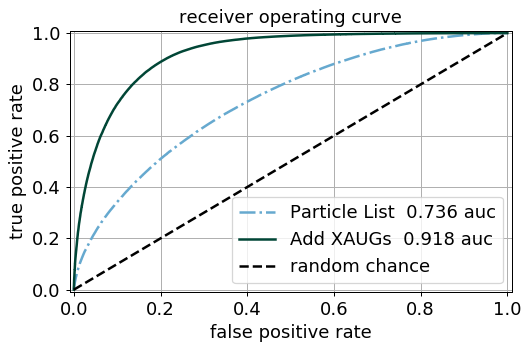

In [30]:
roc17file = 'ROC/071320/ROC___17var__jetconstPt_log__jetconstEta_abs__jetconstE_log__jetconstPt_Jetlog__charge__isEle__isPho__isMuon__isCh__isNh__delta_eta__delta_phi__deltaR_jet__deltaR_subjet0__deltaR_subjet1__dxy__dz.npz'
roc20file = 'ROC/071320/ROC___20var__jetconstPt_log__jetconstEta_abs__jetconstE_log__jetconstPt_Jetlog__charge__isEle__isPho__isMuon__isCh__isNh__delta_eta__delta_phi__deltaR_jet__deltaR_subjet0__deltaR_subjet1__dxy__dz__Xtau21__XchMult__Xjetpull.npz'
roc48file = 'ROC_48var_flat.npz'




roc1 = np.load(roc17file)
x = roc1['false_pos_rate']
y = roc1['true_pos_rate']
auc = roc1['auc']
l = '{0}  {1:0.3f} auc'.format('Particle List', auc)

roc2 = np.load(roc20file)
x2 = roc2['false_pos_rate']
y2 = roc2['true_pos_rate']
auc2 = roc2['auc']
l2 = '{0}  {1:0.3f} auc'.format('Add XAUGs', auc2)

roc3 = np.load(roc48file)
x3 = roc3['false_pos_rate']
y3 = roc3['true_pos_rate']
auc3 = roc3['auc']
l3 = '{0}  {1:0.3f} auc'.format('Add XAUGs', auc3)

plt.plot(x, y, lw=2, linestyle=ls_roc[1], color=cmap_roc(1-color_roc[2]), label=l)
#plt.plot(x2, y2, lw=2, linestyle=ls_roc[1], color=cmap_roc(1-color_roc[1]), label=l2)
plt.plot(x3, y3, lw=2, linestyle=ls_roc[0], color=cmap_roc(1-color_roc[0]), label=l3)


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating curve')
plt.legend(loc="lower right", fontsize='x-large')

plt.tight_layout()
plt.savefig('ROC/'+day+'/ROC_comparison.png')

### Time to Run Whole Notebook

In [ ]:
stoptime = time.time()
delta = stoptime - starttime
print('Elapsed Time: {0:0.1f} min {1:0.2f} sec'.format(delta % 3600 // 60, delta % 3600 % 60))

